## Feature Selection and Dimensionality Reduction Demonstrations
### scRNA-seq analysis in Python course 2024, EBI

#### Preparation

In [36]:
# Package dependencies and suppress unnecessary warning messages 
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning, NumbaWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaWarning)

In [37]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [38]:
pd.set_option('display.max_columns', 40)

In [39]:
# Read data
# Contains normalised counts for 500 cells per sample
adata = sc.read_h5ad("data/Caron_normalized.500.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 5500 × 29346
    obs: 'Sample', 'Barcode', 'SampleName', 'SampleGroup', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'sizeFactor'
    var: 'ID', 'Symbol', 'Chromosome'


In [40]:
adata.obs

,Sample,Barcode,SampleName,SampleGroup,sum,detected,subsets_Mito_sum,subsets_Mito_detected,subsets_Mito_percent,total,sizeFactor
1_CGACTTCGTCCAGTTA-1,SRR9264343,1_CGACTTCGTCCAGTTA-1,ETV6-RUNX1_1,ETV6-RUNX1,4557.0,2024,119.0,12,2.611367,4557.0,0.824416
1_AGAATAGCATACGCTA-1,SRR9264343,1_AGAATAGCATACGCTA-1,ETV6-RUNX1_1,ETV6-RUNX1,7745.0,2695,411.0,12,5.306649,7745.0,1.346255
1_TGACTAGAGAACTCGG-1,SRR9264343,1_TGACTAGAGAACTCGG-1,ETV6-RUNX1_1,ETV6-RUNX1,7181.0,2617,382.0,11,5.319593,7181.0,1.193597
1_CTTAACTGTTATGCGT-1,SRR9264343,1_CTTAACTGTTATGCGT-1,ETV6-RUNX1_1,ETV6-RUNX1,1704.0,1081,129.0,9,7.570423,1704.0,0.436306
1_CCCAGTTTCAAGCCTA-1,SRR9264343,1_CCCAGTTTCAAGCCTA-1,ETV6-RUNX1_1,ETV6-RUNX1,6914.0,2570,371.0,12,5.365924,6914.0,1.231494
...,...,...,...,...,...,...,...,...,...,...,...
8_CTCTACGTCTGCCAGG-1,SRR9264350,8_CTCTACGTCTGCCAGG-1,PRE-T_2,PRE-T,4324.0,1975,96.0,10,2.220167,4324.0,0.787487
8_CGAATGTCAAGCCATT-1,SRR9264350,8_CGAATGTCAAGCCATT-1,PRE-T_2,PRE-T,2426.0,1246,16.0,7,0.659522,2426.0,0.439418
8_TAAGCGTCATCGGAAG-1,SRR9264350,8_TAAGCGTCATCGGAAG-1,PRE-T_2,PRE-T,5454.0,2299,93.0,11,1.705171,5454.0,1.073091
8_AGCGTCGAGATGTAAC-1,SRR9264350,8_AGCGTCGAGATGTAAC-1,PRE-T_2,PRE-T,4221.0,1926,75.0,12,1.776830,4221.0,0.819905


In [41]:
# A quick check that our data is size factor normalized, but not log1p transformed yet
adata.X.max()

8900.0

In [42]:
# Use gene symbols as index - making sure they are unique
adata.var_names_make_unique()

#### Gene variance & HVGs

In [43]:
# Make sure data is log1p transformed
sc.pp.log1p(adata)

In [44]:
# Select highly variable genes by normalized variance (seurat_v3 flavor)
sc.pp.highly_variable_genes(adata, n_top_genes=int(0.1 * adata.n_vars), flavor="seurat_v3")

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:72: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

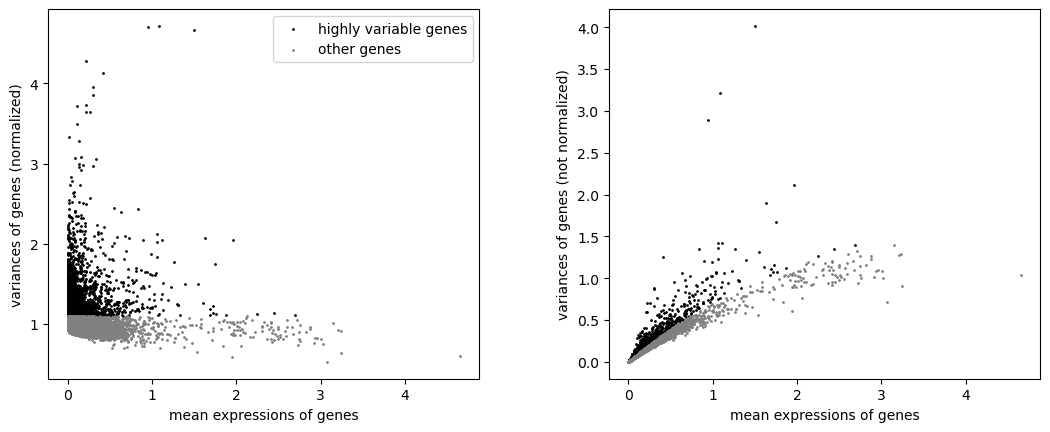

In [45]:
# Plot gene variable
plt.figure(figsize=(10, 6))
sc.pl.highly_variable_genes(adata)

In [46]:
# Get the most highly variable genes (HVGs)
hvgs = adata.var.index[adata.var.highly_variable]
print(f"Number of HVGs: {len(hvgs)}")
print(f"First 10 HVGs: {hvgs[:10].tolist()}")

Number of HVGs: 2934
First 10 HVGs: ['ENSG00000188290', 'ENSG00000187608', 'ENSG00000186827', 'ENSG00000142609', 'ENSG00000142611', 'ENSG00000078900', 'ENSG00000235169', 'ENSG00000284668', 'ENSG00000196581', 'ENSG00000236948']


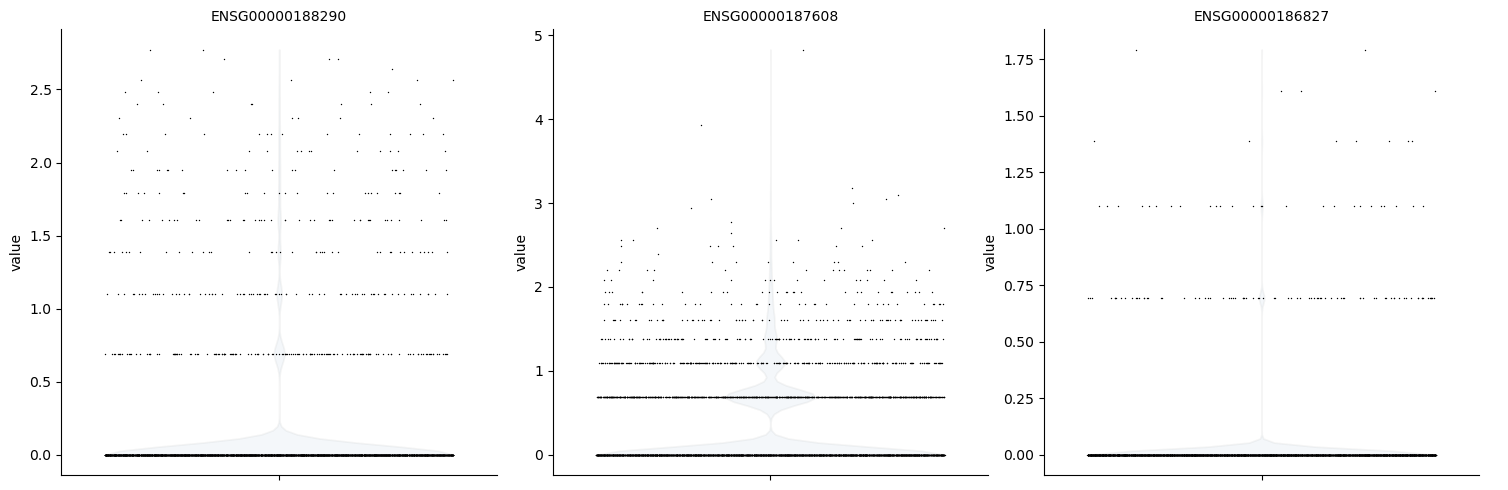

In [83]:
# Visualise their expression
# Note that the "value" axis shows the log1p normalised integer counts and thus have only a few possible values
sc.pl.violin(adata, hvgs[:3], jitter=0.4, alpha=0.05, multi_panel=True)

#### Dimensionality reduction by PCA

In [60]:
# Run PCA
sc.tl.pca(adata, use_highly_variable=True, n_comps=100)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [61]:
# Extract a few rows and columns of the PCA matrix
print(adata.obsm["X_pca"][:10, :5])

[[ 1.5534401  -4.897858    0.1717585  -4.9454083   1.6442586 ]
 [ 6.369452   -5.1173363  -1.0515381  -6.372757   -0.09546499]
 [ 5.1414824  -4.2695513  -0.14163764 -5.53607     1.7661712 ]
 [-6.604236   -3.881048   -2.1904955  -1.9386694  -2.7883122 ]
 [ 6.6226997  -5.9643855  -0.49935204 -6.398001   -0.37729695]
 [14.548857   -2.0338755   5.202222   -9.514764    1.8631716 ]
 [ 2.916798   -5.164475   -1.5988064  -5.33836    -1.3362467 ]
 [ 6.803737   -7.159125    0.52037007 -6.750905    0.5717107 ]
 [-0.2902936  -4.6515746  -0.1510495  -4.7821193   1.1750613 ]
 [ 5.4797397  -3.92537     0.2874693  -5.095914    1.0672677 ]]


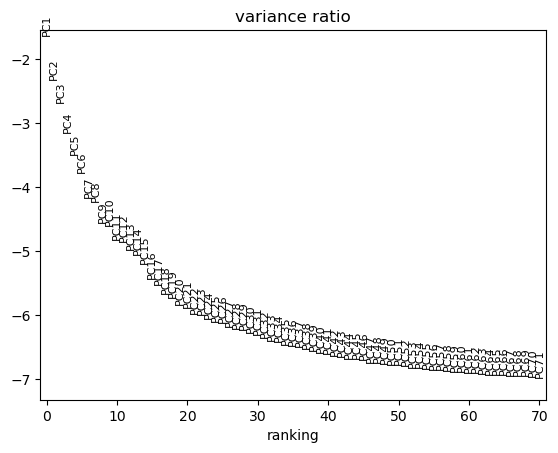

In [71]:
# Visualise the percent variance explained by each PC
# This is called a PCA scree plot
sc.pl.pca_variance_ratio(adata, n_pcs=70, log=True)

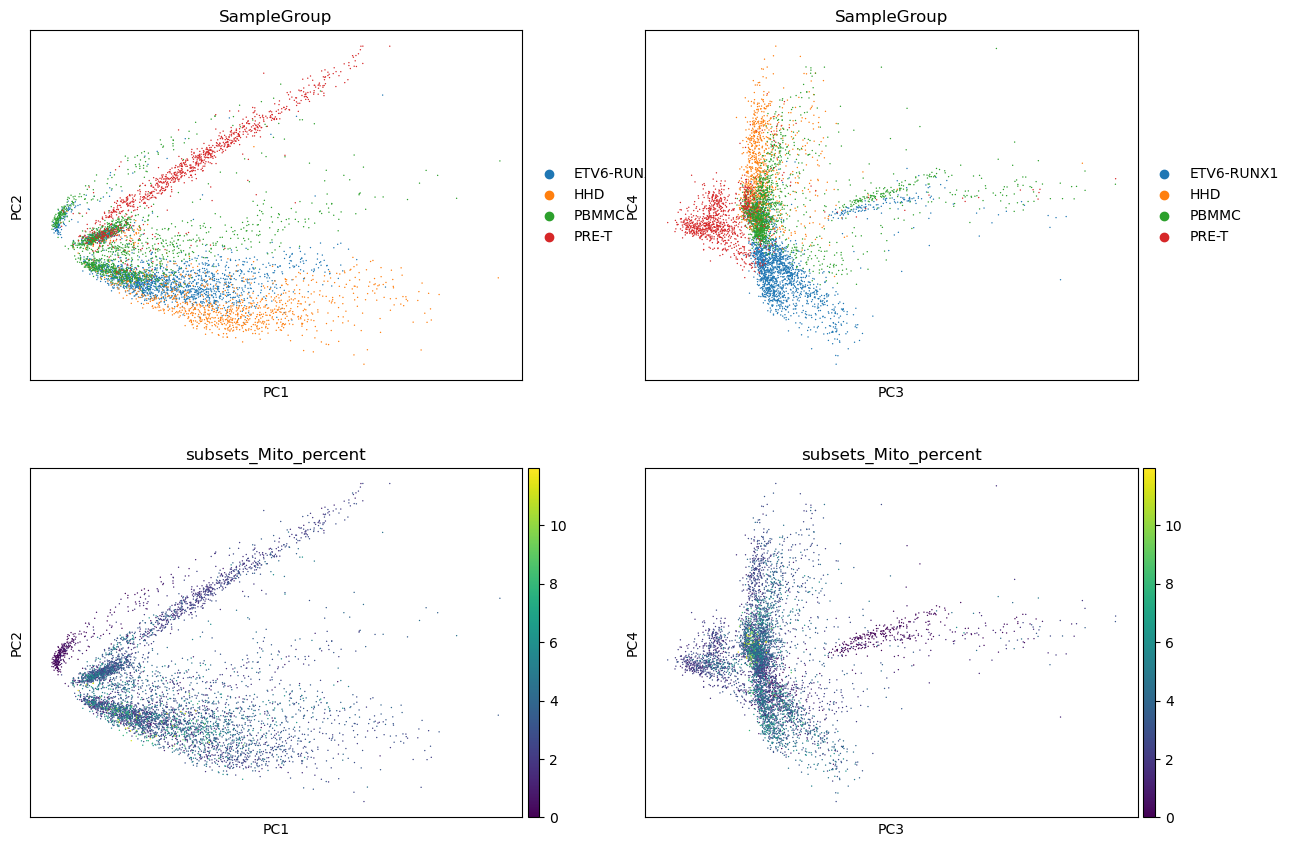

In [82]:
# Visualise PCA result - PC1 vs PC2, PC3 vs PC4
# Check for batch labels and QC metrics, whether any of them drive significant variation in the dataset
sc.pl.pca(
    adata,
    color=["SampleGroup", "SampleGroup", "subsets_Mito_percent", "subsets_Mito_percent"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=4,
)

# We can see that different SampleGroup showed significant variation on the PC space, butb pct_mito didn't

#### Visualisation by UMAP

In [73]:
# First, we need to compute the neighbour graph of cells based on their PCs
# Choose n_pcs based on the scree plot
sc.pp.neighbors(adata, n_pcs=50)

In [74]:
# Now, we visualize the neighbour graph by calculating UMAP (McInnes et al., 2018):
# It projects the graph into 2D

sc.tl.umap(adata)

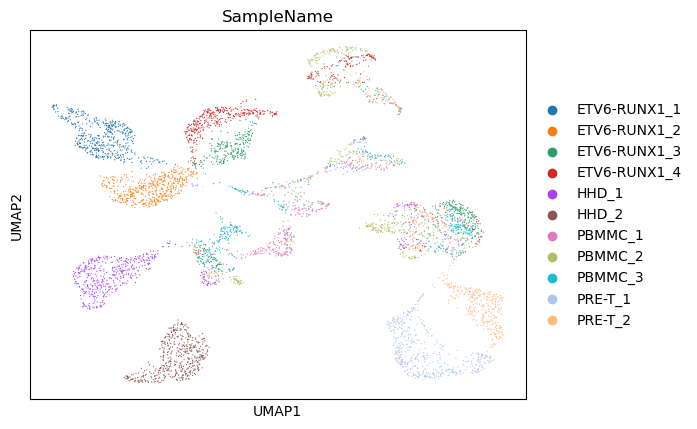

In [76]:
sc.pl.umap(
    adata,
    color="SampleName", # Colour by sample name
    # Setting a smaller point size to get prevent overlap
    size=3,
)

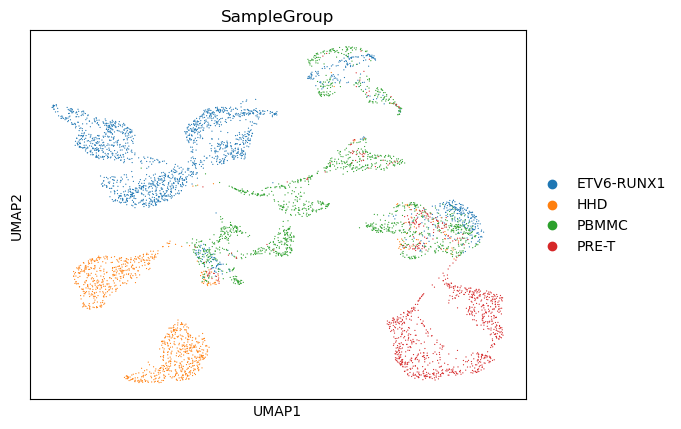

In [80]:
sc.pl.umap(
    adata,
    color="SampleGroup", # Colour by sample type
    # Setting a smaller point size to get prevent overlap
    size=3,
)

#### We can see that the different samples have quite a large batch effect
#### So lets proceed to batch correction and data integration